In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [87]:
train=pd.read_csv('/content/drive/MyDrive/train_age_dataset.csv')
test=pd.read_csv('/content/drive/MyDrive/test_age_dataset.csv')
test.drop(['Unnamed: 0','userId'],axis=1,inplace=True)
train.drop(['Unnamed: 0','userId'],axis=1,inplace=True)

In [88]:
train.head(2)

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.20000,0.0,0.041667,0.025000,0.0,0.000000,0.175,0.033333,0.0,1
1,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.09322,0.0,0.012712,0.018644,0.0,0.084746,0.000,0.033898,82.5,2


In [89]:
test.head(2)

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.033242,4.5,120.313571,0,0.0,0.062992,0.0,0.0,0.012598,0.0,0.0,0.062992,0.0,0.0
1,2,1,0.001818,0.0,0.0,0,0.0,0.0,0.0,0.0,0.051057,9.5,188.615500,0,0.0,0.003636,0.0,0.0,0.000727,0.0,0.0,0.003636,0.0,0.0


In [90]:
train.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,0.341582,1.087395e+02,83.104654,0.320923,0.017065,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,0.195441,5.537516e+04,76.779586,7.649827,0.180402,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,1.000000e+00,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,5.655172e+00,30.724000,0.000000,0.000000,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,8.500000e+00,62.501164,0.000000,0.000000,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,0.460492,1.308654e+01,112.246500,0.000000,0.009091,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,1.000000,3.826604e+07,7541.026000,3228.000000,63.388889,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [91]:
test.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
count,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000
mean,1.976105,1.211856,0.081204,0.344033,0.397432,0.734794,0.000357,0.000909,0.012117,0.178509,0.342335,18.350892,82.572262,0.322202,0.017718,0.393404,0.002133,0.075402,0.067343,0.032848,0.141784,0.152749,0.160141,158.286032
std,0.431142,0.408627,3.103205,0.813081,0.917988,2.822803,0.015529,0.017456,0.130576,0.600530,0.196584,245.222420,73.912128,4.606317,0.156423,0.929538,0.031136,0.212199,0.179688,0.175984,0.396400,0.481607,0.502513,920.210984
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000628,1.000000,0.767000,0.000000,0.000000,0.000873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199768,5.651071,30.447950,0.000000,0.000000,0.040816,0.000000,0.000000,0.002243,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329771,8.500000,62.443638,0.000000,0.000000,0.125000,0.000000,0.003968,0.015789,0.000000,0.011628,0.014493,0.015873,0.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147100,0.460882,13.079052,112.135575,0.000000,0.009009,0.364427,0.000000,0.060000,0.058333,0.000000,0.117647,0.117647,0.125000,178.714286
max,3.000000,2.000000,685.277778,4.000000,4.000000,130.000000,2.333333,1.692308,12.500000,65.800000,1.000000,48286.500000,1600.786667,549.000000,16.915254,34.030303,4.575000,8.897959,8.672727,12.440000,17.060606,24.122449,22.096774,28474.333330


In [92]:
train['avgTimeSpent'].max()

38266041.44

In [93]:
df_avgtime=train.copy()
df_avgtime1 = [x for x in df_avgtime['avgTimeSpent'] if x >= test['avgTimeSpent'].min() and x <= .5e+07 ]

In [94]:
len(df_avgtime1)

488875

In [95]:
train.shape

(488877, 25)

In [96]:
test['avgTimeSpent'].max()

48286.5

In [97]:
test['avgTimeSpent'].min()

1.0

In [98]:
df2 = df_avgtime[(df_avgtime['avgTimeSpent'] <= .5e+07 ) & (df_avgtime['avgTimeSpent'] >= test['avgTimeSpent'].min())]
#df2 = df2[(df2['avgt2'] < test['avgt2'].max()) & (df2['avgt2'] > test['avgt2'].min())]
# df2 = df_avgtime[(df_avgtime['avgTimeSpent'] < test['avgTimeSpent'].max()) & (df_avgtime['avgTimeSpent'] > test['avgTimeSpent'].min())]
# df2 = df_avgtime[(df_avgtime['avgTimeSpent'] < test['avgTimeSpent'].max()) & (df_avgtime['avgTimeSpent'] > test['avgTimeSpent'].min())]
df2.shape

(488875, 25)

In [99]:
df3 = df2[(df2['following_rate'] <= 150) & (df2['following_rate'] >= test['following_rate'].min())]
df3.shape

(488857, 25)

In [100]:
df4 = df3[(df3['emoji_count_per_action'] <= test['emoji_count_per_action'].max()) & (df3['emoji_count_per_action'] >= test['emoji_count_per_action'].min())]
df4.shape

(488847, 25)

In [101]:
df5 = df4[(df4['max_repetitive_punc'] <= 180)]
df5.shape

(488843, 25)

In [102]:
df6 = df5[(df5['avgt2'] <= 28000)]
df6.shape

(488812, 25)

In [103]:
df7 = df6[(df6['avgDuration'] <= 1700)]
df7.shape

(488799, 25)

In [104]:
df8 = df7[(df7['avgComments'] <= 500)]
df8.shape

(488787, 25)

In [105]:
df9 = df8[(df8['creations'] <= 25)]
df9.shape

(488784, 25)

In [106]:
df10 = df9[(df9['content_views'] <= 35)]
df10.shape

(488780, 25)

In [107]:
df11 = df10[(df10['weekends_trails_watched_per_day'] <= 10)]
df11.shape

(488778, 25)

In [108]:
df12 = df11[(df11['weekdays_trails_watched_per_day'] <= 10)]
df12.shape

(488777, 25)

In [109]:
df13 = df12[(df12['slot4_trails_watched_per_day'] <= 25)]
df13.shape

(488773, 25)

In [110]:
df14 = df13[(df13['slot3_trails_watched_per_day'] <= 30)]
df14.shape

(488772, 25)

In [111]:
df15 = df14[(df14['slot2_trails_watched_per_day'] <= 20)]
df15.shape

(488771, 25)

In [112]:
df16 = df15[(df15['slot1_trails_watched_per_day'] <= 15)]
df16.shape

(488767, 25)

In [113]:
df16.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000,488767.000000
mean,1.975436,1.213028,0.070451,0.347382,0.402905,0.735633,0.000277,0.000939,0.012686,0.178908,0.341586,18.394524,83.028860,0.290625,0.016665,0.389737,0.001897,0.074031,0.066602,0.032578,0.141148,0.149780,0.157570,162.797895,1.741472
std,0.430642,0.409448,1.152422,0.816206,0.925175,2.776836,0.012223,0.018067,0.153388,0.646762,0.195436,199.958665,75.151326,3.415491,0.122681,0.883037,0.021413,0.205012,0.167484,0.182789,0.390924,0.437028,0.480608,950.946161,1.088463
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,1.000000,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199685,5.654228,30.718020,0.000000,0.000000,0.040698,0.000000,0.000000,0.002268,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329750,8.500000,62.491507,0.000000,0.000000,0.123967,0.000000,0.003968,0.015873,0.000000,0.011834,0.014545,0.015873,0.000000,1.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.460494,13.083333,112.229401,0.000000,0.009091,0.364407,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.121951,178.642857,2.000000
max,3.000000,2.000000,143.661157,4.000000,4.000000,152.000000,2.333333,1.666667,24.000000,262.666667,1.000000,57123.340000,1682.547500,496.000000,20.722222,32.398058,3.905512,7.782258,8.588889,13.464286,19.250000,25.884615,23.060870,27857.000000,4.000000


In [114]:
test.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
count,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000
mean,1.976105,1.211856,0.081204,0.344033,0.397432,0.734794,0.000357,0.000909,0.012117,0.178509,0.342335,18.350892,82.572262,0.322202,0.017718,0.393404,0.002133,0.075402,0.067343,0.032848,0.141784,0.152749,0.160141,158.286032
std,0.431142,0.408627,3.103205,0.813081,0.917988,2.822803,0.015529,0.017456,0.130576,0.600530,0.196584,245.222420,73.912128,4.606317,0.156423,0.929538,0.031136,0.212199,0.179688,0.175984,0.396400,0.481607,0.502513,920.210984
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000628,1.000000,0.767000,0.000000,0.000000,0.000873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199768,5.651071,30.447950,0.000000,0.000000,0.040816,0.000000,0.000000,0.002243,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329771,8.500000,62.443638,0.000000,0.000000,0.125000,0.000000,0.003968,0.015789,0.000000,0.011628,0.014493,0.015873,0.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147100,0.460882,13.079052,112.135575,0.000000,0.009009,0.364427,0.000000,0.060000,0.058333,0.000000,0.117647,0.117647,0.125000,178.714286
max,3.000000,2.000000,685.277778,4.000000,4.000000,130.000000,2.333333,1.692308,12.500000,65.800000,1.000000,48286.500000,1600.786667,549.000000,16.915254,34.030303,4.575000,8.897959,8.672727,12.440000,17.060606,24.122449,22.096774,28474.333330


In [115]:
train.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,0.341582,1.087395e+02,83.104654,0.320923,0.017065,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,0.195441,5.537516e+04,76.779586,7.649827,0.180402,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,1.000000e+00,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,5.655172e+00,30.724000,0.000000,0.000000,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,8.500000e+00,62.501164,0.000000,0.000000,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,0.460492,1.308654e+01,112.246500,0.000000,0.009091,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,1.000000,3.826604e+07,7541.026000,3228.000000,63.388889,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


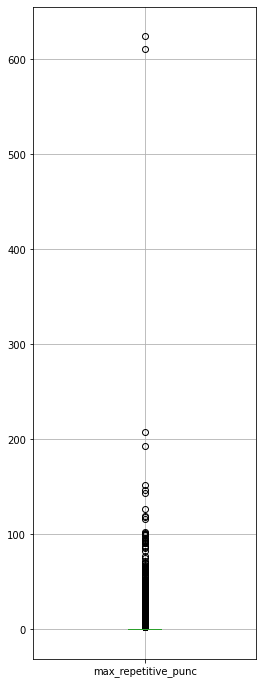

In [116]:
plt.figure(figsize=(4,12))
boxplot = train.boxplot(column=['max_repetitive_punc'])

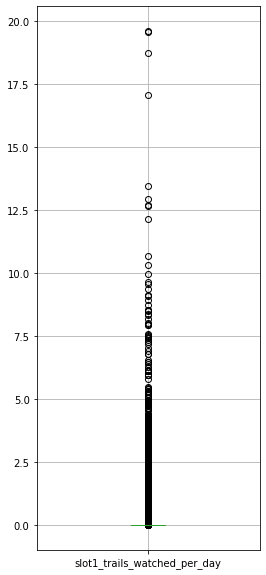

In [117]:
plt.figure(figsize=(4,10))
boxplot = df14.boxplot(column=['slot1_trails_watched_per_day'])

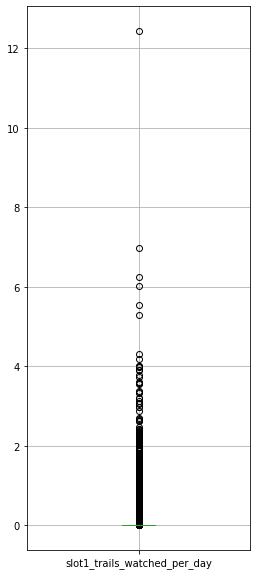

In [118]:
plt.figure(figsize=(4,10))
boxplot = test.boxplot(column=['slot1_trails_watched_per_day'])

In [119]:
# def download_preds(df_download, file_name = 'train_out.csv'):
#   df_download.to_csv(file_name)
#   from google.colab import files
#   files.download(file_name)
# download_preds(df16, file_name = 'train_out.csv')

In [120]:
train_out=pd.read_csv('/content/drive/MyDrive/train_out.csv')

In [121]:
train_out.drop(["Unnamed: 0"], axis=1, inplace=True)
train_out.head(2)

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.20000,0.0,0.041667,0.025000,0.0,0.000000,0.175,0.033333,0.0,1
1,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.09322,0.0,0.012712,0.018644,0.0,0.084746,0.000,0.033898,82.5,2


In [156]:
train_out.head(2)

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.20000,0.0,0.041667,0.025000,0.0,0.000000,0.175,0.033333,0.0,1
1,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.09322,0.0,0.012712,0.018644,0.0,0.084746,0.000,0.033898,82.5,2


In [137]:
y = train_out['age_group']
X = train_out.drop(['age_group'], axis=1, inplace=False)

In [138]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [139]:
train_x,test_x,train_y,test_y=train_test_split(X_res,y_res,test_size=.0625,random_state=42, stratify = y_res)

In [124]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(train_y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=train_y)
class_weights = dict(zip(classes, weights))
class_weights

{1: 0.3963681313168011,
 2: 2.0591891211734463,
 3: 2.02372098364131,
 4: 2.0107554720822876}

In [125]:
class_weights = {1: 0.1,
 2: 4.0591891211734463,
 3: 4.02372098364131,
 4: 4.0107554720822876}

In [140]:
xgb_clf = XGBClassifier(tree_method = 'gpu_hist', gpu_id=0, objective = "multi:softmax", num_class=4,n_estimators=1000, max_depth=15,learning_rate=0.005)

In [141]:
xgb_hist = xgb_clf.fit(train_x, train_y)

In [150]:
test_x.shape

(75985, 24)

In [128]:
xgb_clf.score(train_x,train_y)

0.9392473904399424

In [129]:
xgb_clf.score(test_x,test_y)

0.742143511850203

In [142]:
from sklearn import metrics
expected_y  = test_y
predicted_y = xgb_clf.predict(test_x)
print('Report: ')
print(metrics.classification_report(expected_y, predicted_y))

Report: 
              precision    recall  f1-score   support

           1       0.96      0.87      0.91     18902
           2       0.63      0.78      0.70     19023
           3       0.65      0.55      0.60     19024
           4       0.65      0.66      0.66     19036

    accuracy                           0.71     75985
   macro avg       0.72      0.71      0.72     75985
weighted avg       0.72      0.71      0.72     75985



In [151]:
test=pd.read_csv('/content/drive/MyDrive/test_age_dataset.csv')

In [152]:
test.head(2)

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,62683,33840667,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.033242,4.5,120.313571,0,0.0,0.062992,0.0,0.0,0.012598,0.0,0.0,0.062992,0.0,0.0
1,173104,1828421,2,1,0.001818,0.0,0.0,0,0.0,0.0,0.0,0.0,0.051057,9.5,188.615500,0,0.0,0.003636,0.0,0.0,0.000727,0.0,0.0,0.003636,0.0,0.0


In [153]:
test.drop(["Unnamed: 0","userId"], axis=1, inplace=True)

In [158]:
test.columns

Index(['tier', 'gender', 'following_rate', 'followers_avg_age',
       'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day',
       'avgt2'],
      dtype='object')

In [154]:
test.shape

(54320, 24)

In [160]:
train_x.columns

AttributeError: ignored

In [157]:
prediction = xgb_clf.predict(test)

ValueError: ignored

In [133]:
df_pred = pd.DataFrame({"prediction" : predict}, columns = ["prediction"]).set_index("prediction")

In [134]:
df_pred.head(2)

""
prediction
1
1


In [135]:
def download_preds(df_pred, file_name = 'outliers_4_test_predicted.csv'):
  df_pred.to_csv(file_name)
  from google.colab import files
  files.download(file_name)
download_preds(df_pred, file_name = 'outliers_4_test_predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
# from sklearn.utils.class_weight import compute_class_weight
# classes = np.unique(train_y)
# weights = compute_class_weight(class_weight='balanced', classes=classes, y=train_y)
# class_weights = dict(zip(classes, weights))
# class_weights